# Critical depth for carbon dioxide storage

Carbon dioxide is in the supercritical state, when the pressure is above $p=$ 7.3773MPa and is above $T=$ 30.9780°C. In the supercritical state the density of carbon dioxide is much higher that in the in the gaseous state. Therefore carbon dioxide should be stored underground in its supercritical state.

In [1]:
import properties
rho = properties.from_table("Density (kg/m3)", plot=False)

rho_super = rho(7.4, 31)
rho_gas = rho(0.01, 20) # Ambient pressure is 0.0001013MPa, but the lowest value in the table is 0.01

print(f"Ratio of densities of supercrtical to gaseous state: {rho_super/rho_gas}")

Ratio of densities of supercrtical to gaseous state: 2072.137761541017


This gives an idea of how much more carbon dioxide can be stored in the the storage volume and it is a good argument to store carbon dioxide below a critical depth, so that its in supercritical state.

## Estimate for the critical depth

The hydrostatic pressure in a reservoir be can estimated as
$$ p = \rho \cdot g \cdot z$$

and the subsurface temperature as
$$T = \Delta T \cdot z + T_0.$$ 

Here $z$ is the depth, $g$ is the gravity, $\rho$ is the average fluid density (averaged from surface to the target depth), $\Delta T$ is the thermal gradient and $T_0$ is the average surface temperature.

With defining the pressure and temperature as the critical values carbon dioxide, these equations can be solved for z. Typical values for the thermal gradient are $\Delta T=$ 1.5...4.5°C and typical values for fluid density are $\rho=$ 900...1400. Then we can calculate the critical depth.

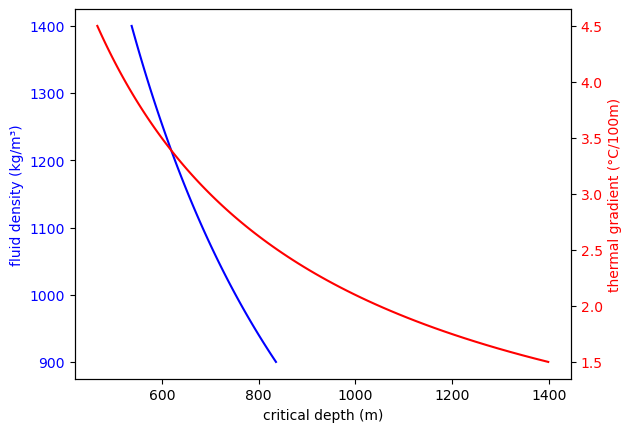

In [2]:
from numpy import linspace
import matplotlib.pyplot as plt

dT = linspace(1.5, 4.5, 100)    # °C/100m thermal gradient
rho = linspace(900, 1400, 100)  # kg/m³ fluid density

p = 7.3773e6 # Pa critical pressure for CO2
T = 30.9780 # °C critical temperature for CO2
T0 = 10.0 # °C average surface temperature
g = 9.81 # m/s² gravity

zp = p / (rho * g)
zT = (T - T0) / (dT / 100)

fig, ax1 = plt.subplots()

# First function and left y axis
ax1.plot(zp, rho, 'b-')
ax1.set_xlabel('critical depth (m)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('fluid density (kg/m³)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

# Second function and right y axis
ax2 = ax1.twinx()
ax2.plot(zT, dT, 'r-')
ax2.set_ylabel('thermal gradient (°C/100m)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

plt.show()

We find, that in areas with a thermal gradient around 3°C/100m the critical depth is around 800m. This is the literature value. Thermal gradients around 2°C/100 require a larger depth, so that carbon dioxide remains in its supercritical state.